Polynomial Regres

y = -0.36 + (2.13 * X^1) + (-0.95 * X^2) + (0.10 * X^3)


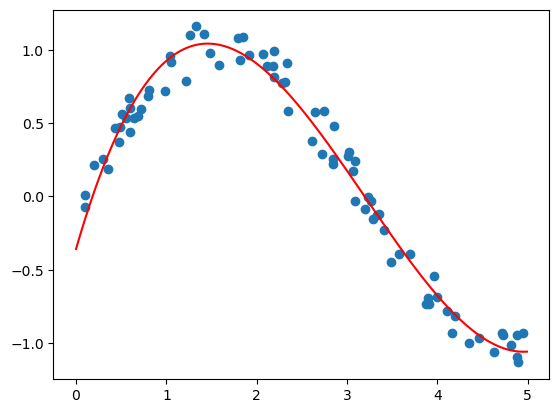

In [130]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from patsy import cr

np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

X_test = np.arange(0, 5, 0.01)[:, np.newaxis]
X_test_poly = poly_features.transform(X_test)

y_pred = model.predict(X_test_poly)

coef = model.coef_

intercept = model.intercept_

result_f = f"y = {intercept:.2f}"
for i, coef in enumerate(coef[1:]):
    result_f += f" + ({coef:.2f} * X^{i+1})"

print(result_f)

plt.scatter(X, y)
plt.plot(X_test, y_pred, color ="red")
plt.show()

Step Function

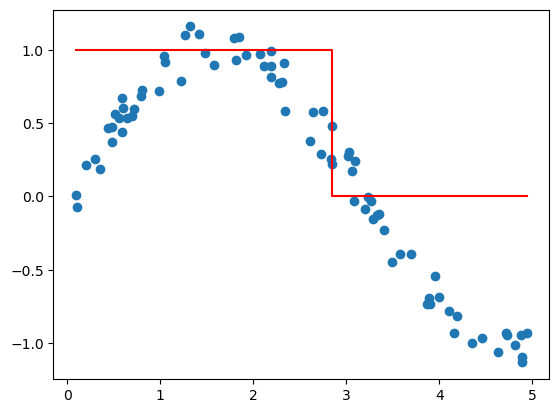

In [117]:
model.fit(X, y)

y_pred = model.predict(X)

def step_function(x):
    return (x >= 0).astype(int)

y_step = step_function(y_pred)

plt.scatter(X, y)
plt.step(X, y_step, color="red")
plt.show()

Piecewise Polynomials

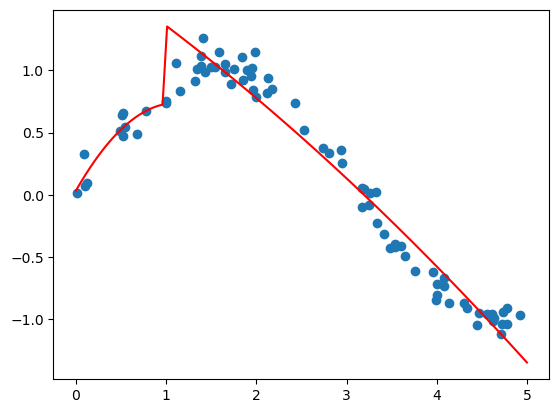

In [171]:
from sklearn.pipeline import make_pipeline
from scipy.optimize import curve_fit

def piecewise_polynomial(x, a0, a1, a2, b0, b1, b2):
    return np.piecewise(x, [x < 1, x >= 1], [lambda x: a0 + a1*x + a2*x**2, lambda x: b0 + b1*x + b2*x**2])

params, params_covariance = curve_fit(piecewise_polynomial, X.flatten(), y)

a0, a1, a2, b0, b1, b2 = params

x_fit = np.linspace(0, 5, 100)
y_fit = piecewise_polynomial(x_fit, a0, a1, a2, b0, b1, b2)

plt.scatter(X, y)
plt.plot(x_fit, y_fit, color="red")
plt.show()

Natural Smoothing Splines

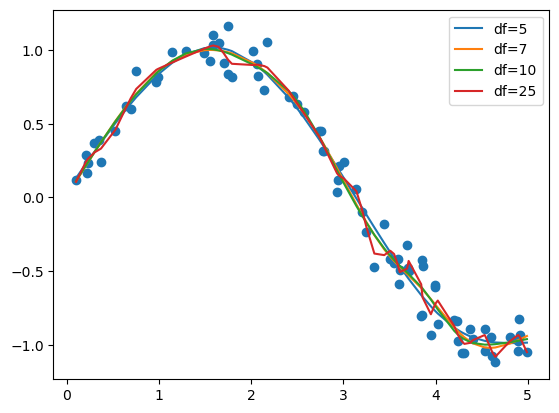

In [220]:
def plot_smoothed(df=5):

    x_basis = cr(X, df=df, constraints="center")

    model = LinearRegression().fit(x_basis, y)

    y_hat = model.predict(x_basis)

    plt.plot(X, y_hat, label=f"df={df}")


plt.scatter(X, y)
for df in (5, 7, 10, 25):
    plot_smoothed(df)
plt.legend()
plt.show()